In [1]:
from datetime import datetime, timedelta

import biosppy as bp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

from ltbio.biosignals import modalities, Event
from ltbio.biosignals.sources.BitalinoShort import BitalinoShort


In [2]:

path_ = 'G:\\PreEpiSeizures\\Patients_HEM\\FCSFDM\\Bitalino'
options = {'date1': datetime(2021, 4, 15, 14, 45, 49),
           'date2': datetime(2021, 4, 15, 14, 49, 32)}
data = BitalinoShort._read(dir=path_, type=modalities.ECG, **options)

In [3]:
sig = data['ECG_chest']

In [4]:
event1 = Event('crise 4', datetime(2021, 4, 15, 14, 47, 32))

973.6364631597525 1691.1388122202827
0.47824404289721056 1745.766253995519
996.7023727556871 1714.110813879204
28.59830787531456 2102.9360085991793


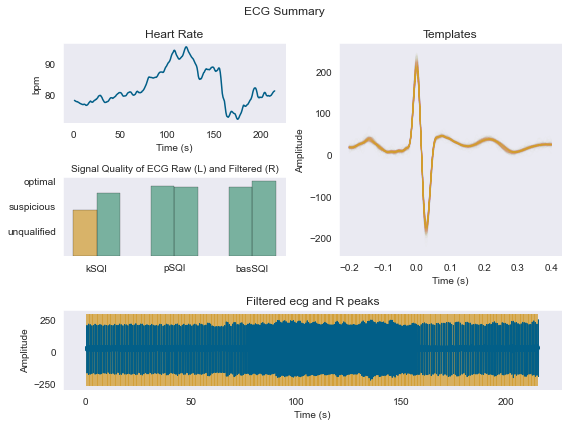

In [5]:
ecg_info = bp.signals.ecg.ecg(sig.to_array(), interactive=False)

In [ ]:
bp.hrv.hrv(rpeaks=ecg_info['rpeaks'])

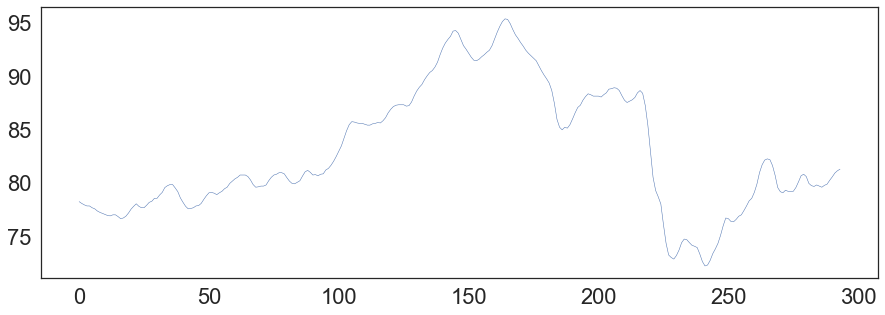

In [22]:
plt.figure(figsize=(15,5))
plt.plot(ecg_info['heart_rate'], linewidth=0.5)

In [6]:
rrate_idx = (ecg_info['heart_rate_ts'] * sig.sampling_frequency).astype(int)
rrate_idx

array([  1365,   2132,   2904,   3675,   4445,   5217,   5993,   6766,
         7544,   8324,   9100,   9881,  10664,  11441,  12219,  13002,
        13784,  14568,  15349,  16126,  16901,  17671,  18440,  19208,
        19985,  20758,  21526,  22296,  23061,  23826,  24588,  25353,
        26109,  26864,  27616,  28367,  29119,  29871,  30631,  31393,
        32162,  32934,  33707,  34483,  35254,  36025,  36796,  37566,
        38331,  39091,  39851,  40608,  41367,  42129,  42890,  43644,
        44402,  45156,  45906,  46654,  47402,  48146,  48890,  49632,
        50376,  51120,  51866,  52619,  53375,  54128,  54880,  55634,
        56387,  57136,  57879,  58623,  59366,  60107,  60847,  61590,
        62334,  63084,  63836,  64586,  65337,  66085,  66831,  67570,
        68307,  69049,  69793,  70537,  71278,  72025,  72765,  73505,
        74242,  74978,  75710,  76437,  77161,  77880,  78594,  79300,
        80001,  80701,  81400,  82102,  82804,  83504,  84206,  84910,
      

In [7]:
# rrate_idx = (ecg_info['heart_rate_ts'] * sig.sampling_frequency).astype(int)
rrate = ecg_info['heart_rate']
ecg_sig = ecg_info['templates']
ts = np.arange(0, 600)
rrate = bp.signals.tools.smoother(rrate, size=3)['signal']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


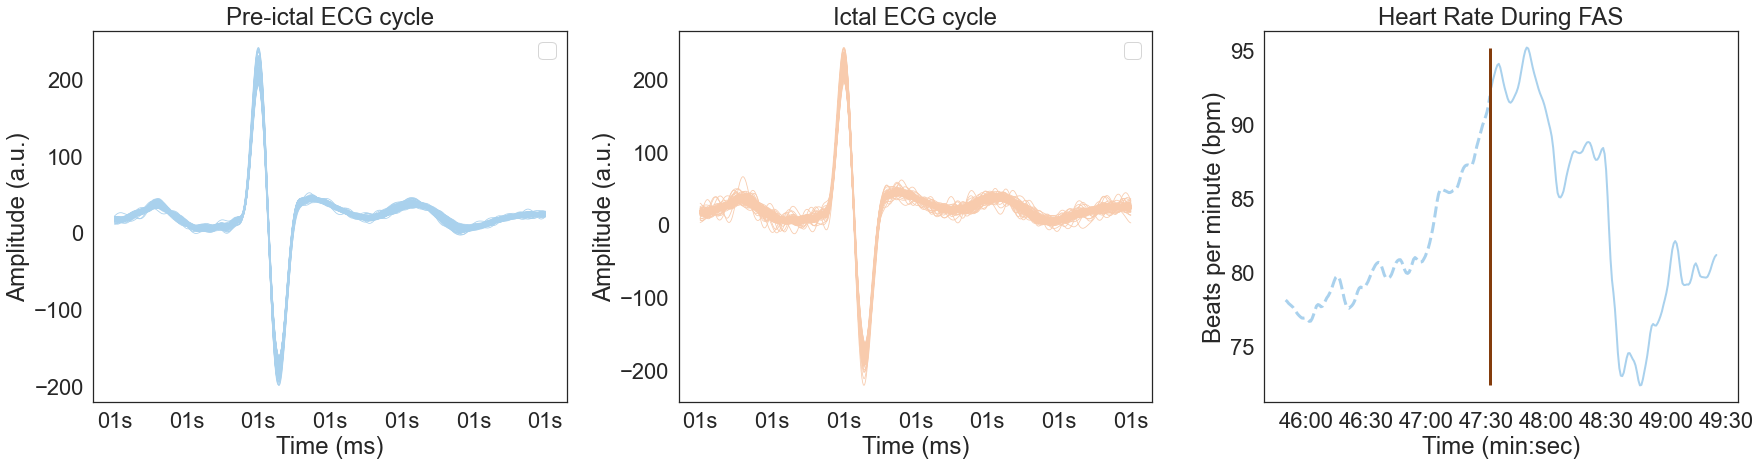

In [14]:
sb.set(font_scale=2)
sb.set_style(style='white')
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))
colors = {'lightblue': '#A9D1ED', 'lightorange': '#F8CBAD',  'darkblue': '#003399', 'onset': '#843C0C', 'teal':'teal', }

color_temp_pi = colors['lightblue']
color_temp_i = colors['lightorange']
color_hr = colors['lightblue']
# plt.title('Respiratory Rate During Seizure')
ax2.set_ylabel('Amplitude (a.u.)')
ax2.set_xlabel('Time (ms)')
ax1.set_ylabel('Amplitude (a.u.)')
ax1.set_xlabel('Time (ms)')
ax2.set_title('Ictal ECG cycle')
ax1.set_title('Pre-ictal ECG cycle')
ax3.set_ylabel('Beats per minute (bpm)')
ax3.set_xlabel('Time (min:sec)')
ax3.set_title('Heart Rate During FAS')

x_axis1 = pd.date_range(datetime(2000,1,1,0,0,0),datetime(2000,1,1,0,0,0)+ timedelta(milliseconds=600), periods=len(ecg_sig[0]))
x_axis3 = pd.date_range(sig.initial_datetime, sig.final_datetime, periods=len(rrate))


ax3.plot(x_axis3[x_axis3 <= event1.onset], rrate[:len(x_axis3[x_axis3 <= event1.onset])], linewidth=3,
         color=color_hr, label='preictal', linestyle='dashed')
ax1.plot(x_axis1, ecg_sig[:len(rrate[:len(x_axis3[x_axis3 <= event1.onset])])].T, linewidth=0.8,
         color=color_temp_pi)

ax2.plot(x_axis1, ecg_sig[len(rrate[:len(x_axis3[x_axis3 <= event1.onset])]):].T, linewidth=0.8,
         color=color_temp_i)
# ax1.plot(x_axis1[x_axis1 >= event1.onset], ecg_sig[-len(x_axis1[x_axis1 >= event1.onset]):], linewidth=2, color='#A9D1ED', label='ictal')
ax3.plot(x_axis3[x_axis3 >= event1.onset], rrate[-len(x_axis3[x_axis3 >= event1.onset]):], linewidth=2, color=color_hr, label='ictal')


from matplotlib.dates import DateFormatter
# ax1.vlines(event1.onset, np.max(ecg_sig), np.min(ecg_sig), color= '#843C0C', label='Seizure Onset', linewidth=3)
ax3.vlines(event1.onset, np.max(rrate), np.min(rrate), color= '#843C0C', label='Seizure Onset', linewidth=3)

ax1.xaxis.set_major_formatter(DateFormatter('%ms'))
ax2.xaxis.set_major_formatter(DateFormatter('%ms'))
ax3.xaxis.set_major_formatter(DateFormatter('%M:%S'))


ax1.legend()
ax2.legend()
plt.tight_layout()
figname = 'C:\\Users\\Mariana\\Documents\\CAT\\images\\ecg_during_seizure'
plt.savefig(figname + '.png')
plt.savefig(figname + '.eps', format='eps')
plt.show()


In [16]:
x_axis1

DatetimeIndex([          '2000-01-01 00:00:00',
               '2000-01-01 00:00:00.001001669',
               '2000-01-01 00:00:00.002003338',
               '2000-01-01 00:00:00.003005008',
               '2000-01-01 00:00:00.004006677',
               '2000-01-01 00:00:00.005008347',
               '2000-01-01 00:00:00.006010016',
               '2000-01-01 00:00:00.007011686',
               '2000-01-01 00:00:00.008013355',
               '2000-01-01 00:00:00.009015025',
               ...
               '2000-01-01 00:00:00.590984974',
               '2000-01-01 00:00:00.591986644',
               '2000-01-01 00:00:00.592988313',
               '2000-01-01 00:00:00.593989983',
               '2000-01-01 00:00:00.594991652',
               '2000-01-01 00:00:00.595993322',
               '2000-01-01 00:00:00.596994991',
               '2000-01-01 00:00:00.597996661',
               '2000-01-01 00:00:00.598998330',
                  '2000-01-01 00:00:00.600000'],
              dtype=